In [2]:
import csv
import networkx as nx
from node2vec import Node2Vec
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

In [3]:
# List 속성
list = []
CWE_ID = []
Vulnerability_Types = []
Score = []
Gained_Access_Level = []
Access = []
Complexity = []
Authentication = []
Conf = []
Integ = []
Avail = []

C:\Users\DI_Lab\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DI_Lab\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DI_Lab\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DI_Lab\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DI_Lab\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DI_Lab\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing 

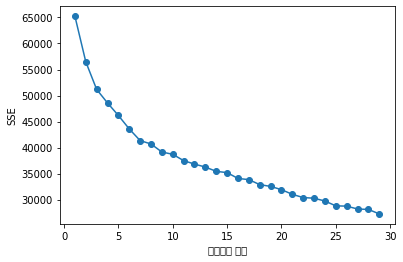

In [31]:
def elbow(x):
    sse = []
    for i in range(1,30):
        km = KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(x)
        sse.append(km.inertia_)
        
    plt.plot(range(1,30), sse, marker='o')
    plt.xlabel("클러스터 개수")
    plt.ylabel("SSE")
    plt.show()
elbow(model1.wv.vectors)

C:\Users\DI_Lab\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DI_Lab\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DI_Lab\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50659 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DI_Lab\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DI_Lab\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DI_Lab\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49892 missing 

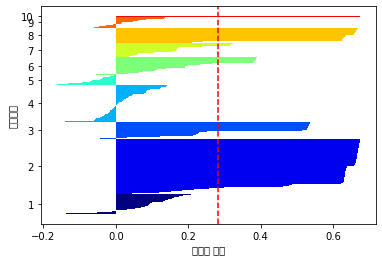

In [49]:
def Silhouette(x, y_km):
        cluster_label = np.unique(y_km)
        n_clusters = cluster_label.shape[0]
        silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')
        y_ax_lower, y_ax_upper = 0, 0
        yticks = []
    
        for i, c in enumerate(cluster_label):
            c_silhouette_vals = silhouette_vals[y_km == c]
            c_silhouette_vals.sort()
            y_ax_upper += len(c_silhouette_vals)
            color = cm.jet(i/n_clusters)
    
            plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor="none", color=color)
            yticks.append((y_ax_upper + y_ax_lower)/2)
            y_ax_lower += len(c_silhouette_vals)
        
        silhouette_avg = np.mean(silhouette_vals)
        plt.axvline(silhouette_avg, color='red', linestyle='--')
        plt.yticks(yticks, cluster_label+1)
        plt.ylabel('클러스터')
        plt.xlabel('실루엣 계수')
        plt.show()
km = KMeans(n_clusters=10, random_state=0)
y_km = km.fit_predict(model1.wv.vectors)
Silhouette(model1.wv.vectors, y_km)

In [4]:
with open('C:/Users/DI_Lab/Desktop/국보연/CVE text제거하고 처리/CVE-ID 전처리 - 복사본.csv', 'r', encoding='UTF8') as f:
    reader = csv.reader(f)
    rupe = 0
    for txt in reader:
        if rupe == 0:
            rupe = 1
        else:
            for i in range(0,11):
                if i == 0:
                    tol = str(txt[i])
                    list.append(tol)
                elif i == 1:
                    tol = str(txt[i])
                    if tol in CWE_ID:
                        pass
                    else:
                        CWE_ID.append(tol)
                elif i == 2:
                    tol = str(txt[i])
                    if tol in Vulnerability_Types:
                        pass
                    else:
                        Vulnerability_Types.append(tol)
                elif i == 3:
                    tol = str(txt[i])
                    if tol in Score:
                        pass
                    else:
                        Score.append(tol)
                elif i == 4:
                    tol = str(txt[i])
                    if tol in Gained_Access_Level:
                        pass
                    else:
                        Gained_Access_Level.append(tol)
                elif i == 5:
                    tol = str(txt[i])
                    if tol in Score:
                        pass
                    else:
                        Score.append(tol)
                elif i == 6:
                    tol = str(txt[i])
                    if tol in Access:
                        pass
                    else:
                        Access.append(tol)
                elif i == 7:
                    tol = str(txt[i])
                    if tol in Authentication:
                        pass
                    else:
                        Authentication.append(tol)
                elif i == 8:
                    tol = str(txt[i])
                    if tol in Conf:
                        pass
                    else:
                        Conf.append(tol)
                elif i == 9:
                    tol = str(txt[i])
                    if tol in Integ:
                        pass
                    else:
                        Integ.append(tol)
                elif i == 10:
                    tol = str(txt[i])
                    if tol in Avail:
                        pass
                    else:
                        Avail.append(tol)

G = nx.Graph()

In [5]:
# list data 및 속성 node 추가

G.add_nodes_from(CWE_ID, kind='CWE_ID')
G.add_nodes_from(Vulnerability_Types, kind='Vulnerability_Types')
G.add_nodes_from(Score, kind='Score')
G.add_nodes_from(Gained_Access_Level, kind='Gained_Access_Level')
G.add_nodes_from(Access, kind='Access')
G.add_nodes_from(Complexity, kind='Complexity')
G.add_nodes_from(Authentication, kind='Authentication')
G.add_nodes_from(Conf, kind='Conf')
G.add_nodes_from(Integ, kind='Integ')
G.add_nodes_from(Avail, kind='Avail')
G.add_nodes_from(list, kind='list')

C:\Users\DI_Lab\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


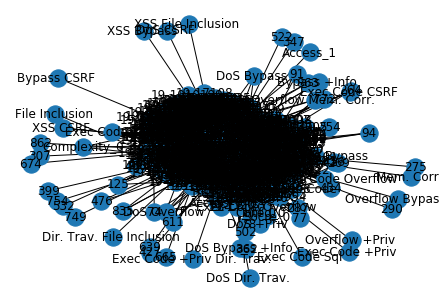

In [6]:
with open('C:/Users/DI_Lab/Desktop/국보연/CVE text제거하고 처리/CVE-ID 전처리 - 복사본.csv', 'r', encoding='UTF8') as f:
    reader = csv.reader(f)
    rupe = 0
    for txt in reader:
        if rupe == 0:
            rupe = 1
        else:
            for i in range(0,11):
                if i == 0:
                    tol = str(txt[i])
                    start_edge = str(tol)
                else:
                    tol = str(txt[i])
                    end_edge = str(tol)
                    G.add_edge(start_edge, end_edge)

nx.draw(G, with_labels=True)

In [7]:
node2vec = Node2Vec(graph=G, # target graph
                    dimensions=50, # embedding dimension
                    walk_length=10, # number of nodes in each walks
                    p = 1, # return hyper parameter
                    q = 0.0001, # inout parameter, q값을 작게 하면 structural equivalence를 강조하는 형태로 학습됩니다.
                    weight_key=None, # if weight_key in attrdict
                    num_walks=200,
                    workers=1,
                   )
# 대략 walk들이 어떻게 발생하는지를 아래처럼 볼 수도 있습니다.
for i, each_walk in enumerate(node2vec.walks):
    print(f"{i:0>2d}, {each_walk}")
    if i>1:
        break
# 발생한 walk를 사용해서 학습을 시켜봅니다.
# 여기서 fitting할때 사용하는 argument는 gensim의 word2vec과 같습니다.
# 단 학습시킨 것을 model1처럼 어디에 집어넣어줘야 하는 것 같네요. 여기서 p나 q값을 조절하기는 어려운 것 같습니다.
model1 = node2vec.fit(window=2)
# kmeans clustering을 진행해줍니다.

K = 8
kmeans = KMeans(n_clusters=K, random_state=0).fit(model1.wv.vectors)
# node의 cluster 부분을 attrdict에 업데이트해줍니다.
for n, label in zip(model1.wv.index2entity, kmeans.labels_):
    G.nodes[n]['label'] = label

Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████| 1000/1000 [03:58<00:00,  4.10it/s]


00, ['19-16687', 'Avail_1', '19-16197', 'Gained Access Level_1', '19-17051', 'Avail_2', '19-15835', 'Gained Access Level_1', '19-16994', 'Integ_1']
01, ['19-1003011', 'Authentication_2', '19-1003014', 'Conf_1', '19-16914', 'Socre_2', '19-1010262', 'Authentication_1', '19-16117', 'Avail_1']
02, ['19-1010112', 'CSRF ', '19-17386', 'Socre_1', '19-15868', 'Avail_2', '19-1010069', 'Conf_1', '19-16728', 'Integ_2']


C:\Users\DI_Lab\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


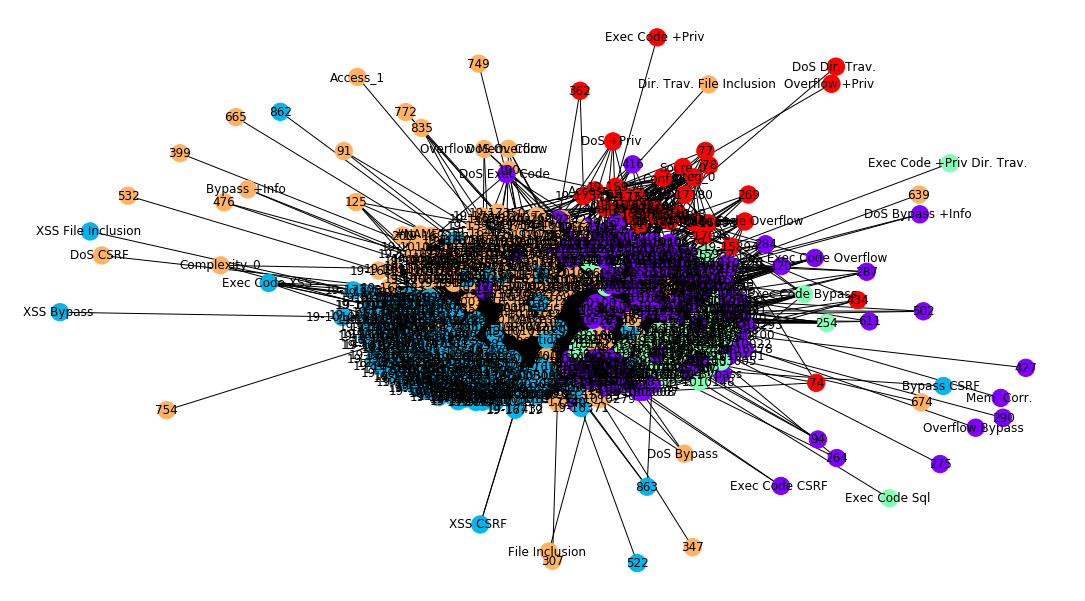

In [9]:
# 그림을 그려줍니다. k = 5
plt.figure(figsize=(19.20,10.80))
nx.draw_networkx(G, pos=nx.layout.spring_layout(G),
                 node_color=[n[1]['label'] for n in G.nodes(data=True)],
                 cmap=plt.cm.rainbow
                )
plt.axis('off')
plt.show()

C:\Users\DI_Lab\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


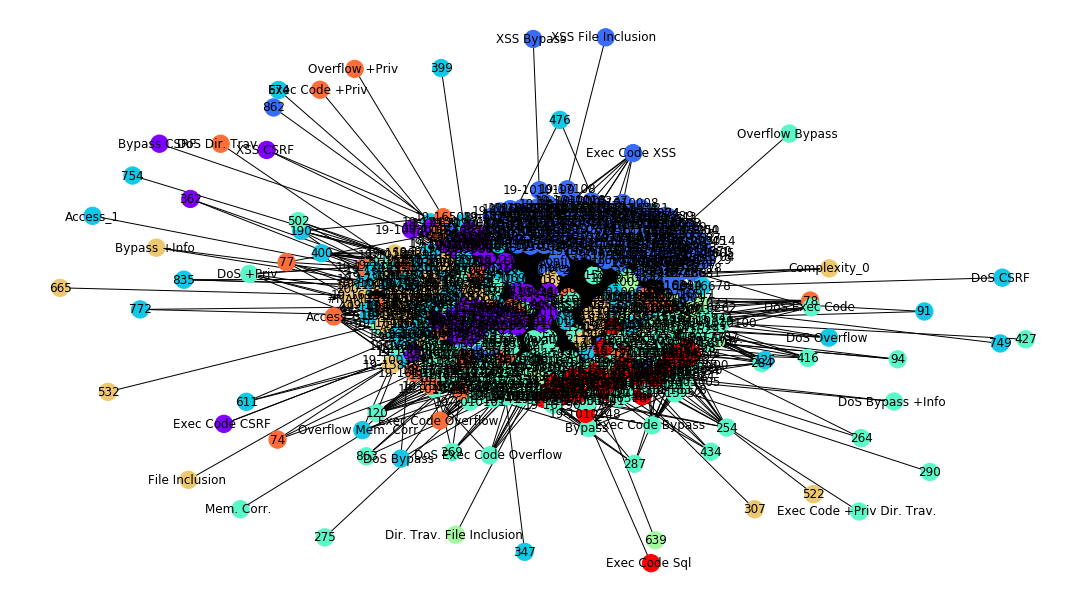

In [52]:
# 그림을 그려줍니다. k = 8
plt.figure(figsize=(19.20,10.80))
nx.draw_networkx(G, pos=nx.layout.spring_layout(G),
                 node_color=[n[1]['label'] for n in G.nodes(data=True)],
                 cmap=plt.cm.rainbow
                )
plt.axis('off')
plt.show()

In [15]:
G.nodes(data=True)

NodeDataView({'79': {'kind': 'CWE_ID', 'label': 1}, '200': {'kind': 'CWE_ID', 'label': 3}, '77': {'kind': 'CWE_ID', 'label': 4}, '119': {'kind': 'CWE_ID', 'label': 0}, '284': {'kind': 'CWE_ID', 'label': 0}, '20': {'kind': 'CWE_ID', 'label': 0}, '347': {'kind': 'CWE_ID', 'label': 3}, '400': {'kind': 'CWE_ID', 'label': 3}, '749': {'kind': 'CWE_ID', 'label': 3}, '89': {'kind': 'CWE_ID', 'label': 2}, '190': {'kind': 'CWE_ID', 'label': 3}, '754': {'kind': 'CWE_ID', 'label': 3}, '22': {'kind': 'CWE_ID', 'label': 3}, '125': {'kind': 'CWE_ID', 'label': 3}, '78': {'kind': 'CWE_ID', 'label': 4}, '416': {'kind': 'CWE_ID', 'label': 0}, '476': {'kind': 'CWE_ID', 'label': 3}, '287': {'kind': 'CWE_ID', 'label': 0}, '352': {'kind': 'CWE_ID', 'label': 0}, '275': {'kind': 'CWE_ID', 'label': 0}, '427': {'kind': 'CWE_ID', 'label': 0}, '399': {'kind': 'CWE_ID', 'label': 3}, '264': {'kind': 'CWE_ID', 'label': 0}, '91': {'kind': 'CWE_ID', 'label': 3}, '254': {'kind': 'CWE_ID', 'label': 2}, '611': {'kind': 'C

In [51]:
node2vec = Node2Vec(G, dimensions=20, walk_length=16, num_walks=100, workers=2)
fix_formatted_positions = lambda x: x.split('_')[0] if x in formatted_positions else x
reformatted_walks = [list(map(fix_formatted_positions, walk)) for walk in node2vec.walks]
node2vec.walks = reformatted_walks
model = node2vec.fit(window=10, min_count=1)

Computing transition probabilities: 100%|███████████████████████████████████████████| 599/599 [00:04<00:00, 134.73it/s]


TypeError: 'list' object is not callable